In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("DataSet/OPTION2_joined_coursework_dataset_banking_final (1).csv")

In [9]:
df.head()

,text,label,query_index
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,526cd7f17526
1,What kind of fiat currency can I used for hold...,other,f3cf7343067e
2,I did not get the item I ordered. How should ...,other,9a19501c3a3c
3,Freeze my account it's been hacked.,needs_troubleshooting,d76b07db8cf8
4,is there a reason that my payment didnt go thr...,other,bd95ba09a18d


In [10]:
df.isnull().sum()

text             0
label          521
query_index      0
dtype: int64

In [11]:
df = df.fillna('other')

In [12]:
df.isnull().sum()

text           0
label          0
query_index    0
dtype: int64

In [13]:
del df['query_index']

In [14]:
df.shape

(14195, 2)

In [15]:
df['label'].value_counts()

other                       5557
needs_troubleshooting       4305
card_queries_or_issues      2598
top_up_queries_or_issues    1684
Other                         21
Card_queries_or_issues        12
Top_up_queries_or_issues      11
Needs_troubleshooting          7
Name: label, dtype: int64

In [16]:
df['label'] = df['label'].str.lower()

In [17]:
df['label'].value_counts()

other                       5578
needs_troubleshooting       4312
card_queries_or_issues      2610
top_up_queries_or_issues    1695
Name: label, dtype: int64

<AxesSubplot: title={'center': 'Count of number of labels'}>

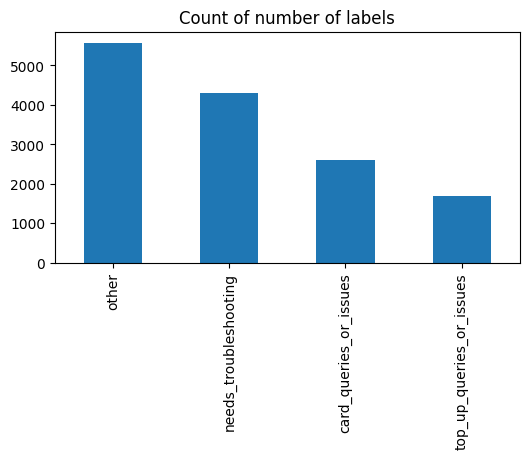

In [18]:
df['label'].value_counts().plot(kind='bar', title="Count of number of labels", figsize = (6,3))

In [19]:
# Converting ordinal variable rating to numeric

df['label'].replace({'other':1, 'needs_troubleshooting':2, 'card_queries_or_issues':3, 'top_up_queries_or_issues':4 }, inplace = True)

In [20]:
df

,text,label
0,Can I automatically top-up when traveling?,4
1,What kind of fiat currency can I used for hold...,1
2,I did not get the item I ordered. How should ...,1
3,Freeze my account it's been hacked.,2
4,is there a reason that my payment didnt go thr...,1
...,...,...
14190,Can you tell me what the disposable cards are ...,3
14191,The ATM won't give me my card back. I need it ...,3
14192,Can you please tell me why my card payments ar...,3
14193,The rate for a currency exchange was wrong whe...,2


# Data Cleaning in Text Column

In [22]:
import re ## Regular Expression
import nltk ## Natural Language Took Kit

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabbo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
sw = set(stopwords.words('english'))

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
df["text"][10000]

"I got mugged yesterday and they took everything. I can't use the app, so I need some help."

In [29]:
def clean_text(sample):
  sample = sample.lower()
  sample = re.sub("[^a-zA-Z]+"," ", sample)
  sample = sample.split()
  sample = [ps.stem(s) for s in sample if s not in sw] # list compreshension 
  sample = " ".join(sample)

  return sample

In [30]:
clean_text(df["text"][10000]) # Example for the fucntion

'got mug yesterday took everyth use app need help'

In [31]:
# Apply the fucntion to dataset text column

df['processed_text'] = df['text'].apply(clean_text)

In [33]:
df.head()

,text,label,processed_text
0,Can I automatically top-up when traveling?,4,automat top travel
1,What kind of fiat currency can I used for hold...,1,kind fiat currenc use hold exchang
2,I did not get the item I ordered. How should ...,1,get item order go cancel order payment pleas help
3,Freeze my account it's been hacked.,2,freez account hack
4,is there a reason that my payment didnt go thr...,1,reason payment didnt go


In [34]:
corpus = df['processed_text'].values

In [35]:
corpus

array(['automat top travel', 'kind fiat currenc use hold exchang',
       'get item order go cancel order payment pleas help', ...,
       'pleas tell card payment go tri buy someth onlin put card payment take come back later',
       'rate currenc exchang wrong bought someth', 'abl track card sent'],
      dtype=object)

# Data Transformation

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1600)

In [37]:
X = cv.fit_transform(corpus).toarray()

In [38]:
X[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
y=df['label'].values

In [40]:
y[:100]

array([4, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 4, 2, 2, 1, 2, 1, 3, 2, 1, 1, 4, 1,
       1, 1, 4, 1, 2, 1, 1, 2, 1, 3, 2, 2, 4, 1, 2, 1, 2, 2, 2, 3, 1, 1,
       2, 1, 2, 2, 4, 1, 2, 2, 1, 2, 3, 1, 2, 1, 2, 2, 3, 3, 4, 4, 3, 3,
       1, 2, 2, 1, 3, 2, 2, 4, 2, 1, 2, 1], dtype=int64)

In [44]:
## Saving Bow dictionary to later use

import pickle

bow_path = '01.Model.pkl'
pickle.dump(cv,open(bow_path, "wb"))

# Dividing Dataset into training and test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [46]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB()

In [47]:
# Exporting NB Classifier to later use in prediction

import joblib
joblib.dump(classifier,'02.ClassifierModel')

['02.ClassifierModel']

# Model Performance

In [48]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[331 235 208 352]
 [ 29 382 119 337]
 [  8  13 301 178]
 [ 12   1   7 326]]


0.4719971821063755